In [ ]:
#importing library
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  re

In [ ]:
from summarizer import Summarizer


In [ ]:
#loading data
data = pd.read_csv(r'/content/drive/MyDrive/united2/RAw/data.csv')

In [ ]:
#data['agent_id_x'],data['agent_id_y']

In [ ]:
#dropping irrelavant column for transcript analysis
columns_to_drop = ['agent_assigned_datetime', 'call_end_datetime','call_day','call_hour','average_sentiment', 'silence_percent_average', 'call_duration',
       'response_time', 'AHT', 'AST',
       'customer_name', 'agent_id_y', 'agent_tone', 'customer_tone','customer_id','agent_id_x','elite_level_code','call_start_datetime']
data = data.drop(columns=columns_to_drop, errors='ignore')

In [1]:
#data.columns

In [ ]:
import spacy
from collections import Counter
from string import punctuation

# Load the pre-trained spaCy model (English)
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to summarize the call transcript
def summarize_chat(text, summary_length=3):
    # Process the text using spaCy
    doc = nlp(text)

    # Filter tokens that are not stopwords or punctuation
    words = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]

    # Find the most common words in the chat
    word_freq = Counter(words)
    max_freq = word_freq.most_common(1)[0][1]  # Highest word frequency

    # Normalize word frequencies
    for word in word_freq:
        word_freq[word] = word_freq[word] / max_freq

    # Rank sentences based on word frequencies
    sentence_scores = {}
    for sent in doc.sents:
        for word in sent:
            if word.text.lower() in word_freq:
                if sent not in sentence_scores:
                    sentence_scores[sent] = word_freq[word.text.lower()]
                else:
                    sentence_scores[sent] += word_freq[word.text.lower()]

    # Sort sentences by score and select the top sentences
    ranked_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    summary = " ".join([str(sent) for sent in ranked_sentences[:summary_length]])

    return summary

In [ ]:
# Apply the summarizer to each row of the 'call_transcript' column
data['final_summary'] = data['call_transcript'].apply(summarize_chat)

In [ ]:
#saving the data locally
#data.to_csv('/content/drive/MyDrive/united2/RAw/transcript_data.csv', index=False)


In [ ]:
#data.head()

,call_id,call_transcript,primary_call_reason,final_summary
0,4667960400,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Thank you for calling United Airlines customer...
1,2266439882,\n\nAgent: Thank you for calling United Airlin...,Upgrade,It looks like with the fare differences and ch...
2,1211603231,\n\nAgent: Thank you for calling United Airlin...,Seating,It looks like there is a $100 change fee that ...
3,5297766997,\n\nAgent: Thank you for calling United Airlin...,Mileage Plus,Unfortunately that flight is non-refundable so...
4,8902603117,\n\nAgent: Thank you for calling United Airlin...,Mileage Plus,I could switch your ticket over to that flight...


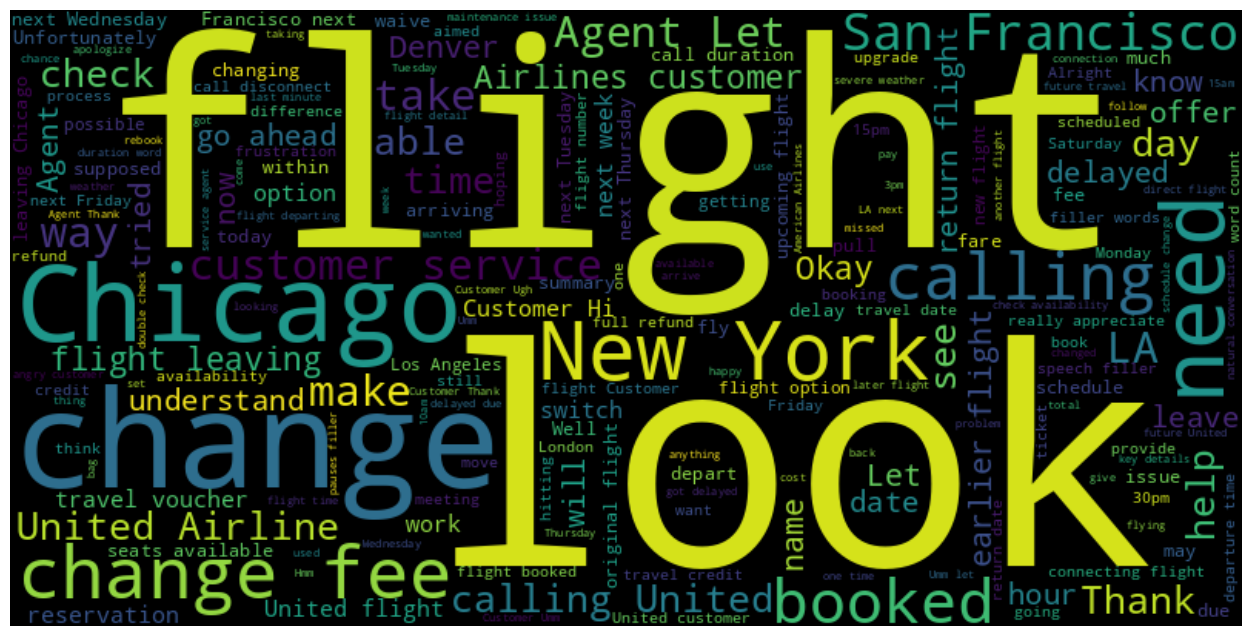

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(data['final_summary'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#Reloading the data file ---transcript.csv

In [ ]:
transcript = pd.read_csv(r'/content/drive/MyDrive/united2/RAw/transcript_data.csv')

In [2]:
#transcript.head()

In [ ]:
# Function to Standardized text
def text_cleaning(text):
    if isinstance(text, str):  # Check if the value is a string
        text = text.strip()  # Remove leading/trailing whitespaces
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'[-]', '', text)  # Remove hyphens
        text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
        return text.strip()  # Return cleaned text with leading/trailing spaces removed
    else:
        return np.nan  # Return NaN for non-string values

In [ ]:
# Post-processing of data
def post_process_text(text):
    # Define a list of words/phrases to remove
    words_to_remove = ["thank you", "flight", 'you', 'for', 'calling', 'united', 'airlines',
                       'customer', 'service,', 'my', 'name', 'is', 'how', 'may', 'I', 'help', 'you','agent','new york','chicago','let','look','earlier',
                       'san francco', 'make', 's','ahead', 'date', 'time','denver']
    # Loop through the list and remove each word/phrase from the text
    for word in words_to_remove:
        text = text.replace(word, "")
    # Remove any extra whitespace left after removal
    text = " ".join(text.split())
    # Return the processed text
    return text

In [ ]:
# Applying pre-processing
transcript['final_summary'] = transcript['final_summary'].apply(text_cleaning)

In [ ]:
# Applying post-processing
transcript['final_summary'] = transcript['final_summary'].apply(post_process_text)

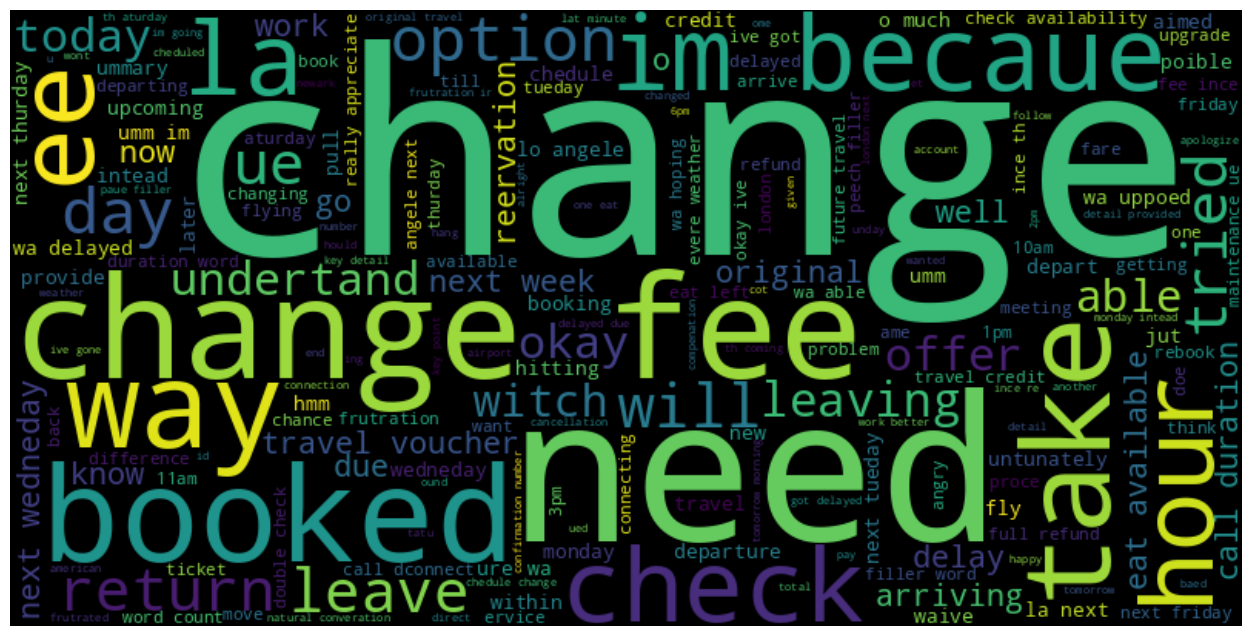

In [ ]:
# to extract relavant words based on frequeny
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(transcript['final_summary'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
#kindly move to next code file -----predict.ipynb